In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_RF_function_and_feature_ranking_TNGSIM as functions
import RF_target_predicting_and_learning_curves_functions_TNGSIM as tp_lc_functions

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)

In [3]:
df100_raw = pd.read_csv('TNG-SIM_images/v3_initial_analysis/v3_TNG-SIM_Raw_Dataset.csv')

In [4]:
df50 = pd.read_hdf('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG_Data_SAM_and_SIM/data/tng50-matchLHalo.h5') 

In [5]:
df300 = pd.read_hdf('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG_Data_SAM_and_SIM/data/tng300-matchLHalo.h5') 

In [6]:
df50.shape

(12682, 46)

In [8]:
df100_raw.shape

(21598, 20)

In [7]:
df300.shape

(211869, 46)

### Add Log Mstar & Log SFR columns for each TNG box

In [9]:
df50.loc[:,'SubhaloMstar_Log']=df50.loc[:,'SubhaloMstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df50.loc[:,'SubhaloRstar_Log']=df50.loc[:,'SubhaloRstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df50.loc[:,'SubhaloSFRinRad_Log']=df50.loc[:,'SubhaloSFRinRad'].apply(lambda x: np.log10(x) if x>0 else 0)

df100_raw.loc[:,'SubhaloMstar_Log']=df100_raw.loc[:,'SubhaloMstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df100_raw.loc[:,'SubhaloRstar_Log']=df100_raw.loc[:,'SubhaloRstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df100_raw.loc[:,'SubhaloSFRinRad_Log']=df100_raw.loc[:,'SubhaloSFRinRad'].apply(lambda x: np.log10(x) if x>0 else 0)

df300.loc[:,'SubhaloMstar_Log']=df300.loc[:,'SubhaloMstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df300.loc[:,'SubhaloRstar_Log']=df300.loc[:,'SubhaloRstar'].apply(lambda x: np.log10(x) if x>0 else 0)
df300.loc[:,'SubhaloSFRinRad_Log']=df300.loc[:,'SubhaloSFRinRad'].apply(lambda x: np.log10(x) if x>0 else 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


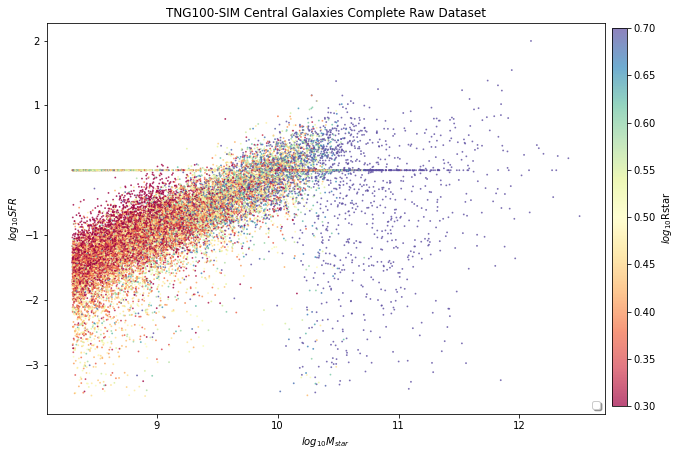

In [17]:
# In this plot, all SFRinRad=0 values remain so after taking the Log of SFRinRad
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(df100_raw.loc[:, 'SubhaloMstar_Log'], df100_raw.loc[:, 'SubhaloSFRinRad_Log'],
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df100_raw.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG100-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG100-SIM_Raw_SFRvsMstar_colorRstar_Log.jpeg", dpi=500)
plt.show()

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


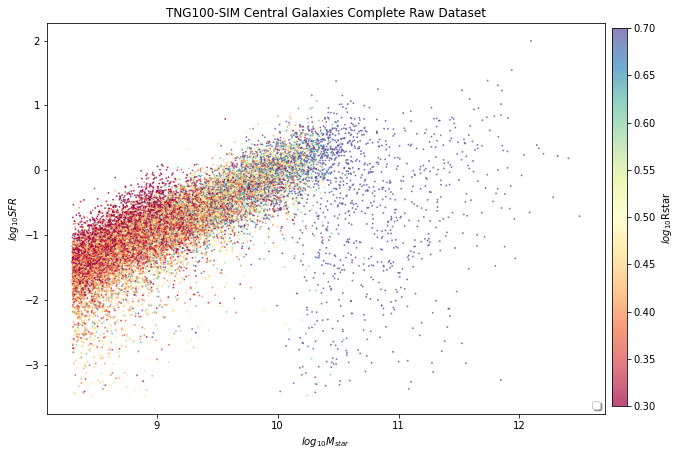

In [12]:
# In this plot, all SFRinRad=0 values become infinity after taking the Log; the plot is not showing those values
# I believe
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(np.log10(df100_raw.loc[:, 'SubhaloMstar']), np.log10(df100_raw.loc[:, 'SubhaloSFRinRad']),
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df100_raw.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG100-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG100-SIM_Raw_SFRvsMstar_colorRstar.jpeg", dpi=500)
plt.show()

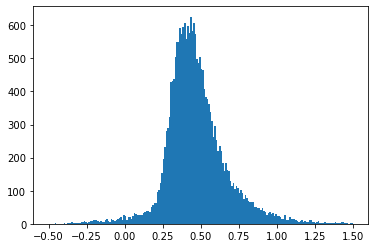

In [13]:
plt.hist(np.log10(df100_raw.loc[:, 'SubhaloRstar']), bins=200, range=(-0.5, 1.5))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


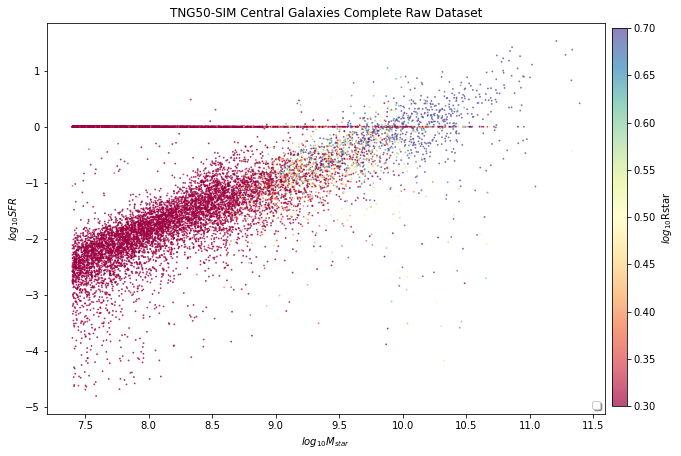

In [16]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(df50.loc[:, 'SubhaloMstar_Log'], df50.loc[:, 'SubhaloSFRinRad_Log'],
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df50.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG50-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG50-SIM_Raw_SFRvsMstar_colorRstar_Log.jpeg", dpi=500)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


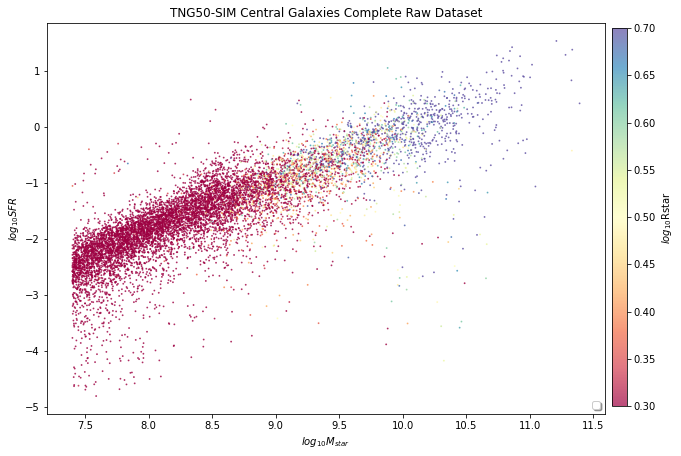

In [15]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(np.log10(df50.loc[:, 'SubhaloMstar']), np.log10(df50.loc[:, 'SubhaloSFRinRad']),
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df50.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG50-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG50-SIM_Raw_SFRvsMstar_colorRstar.jpeg", dpi=500)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


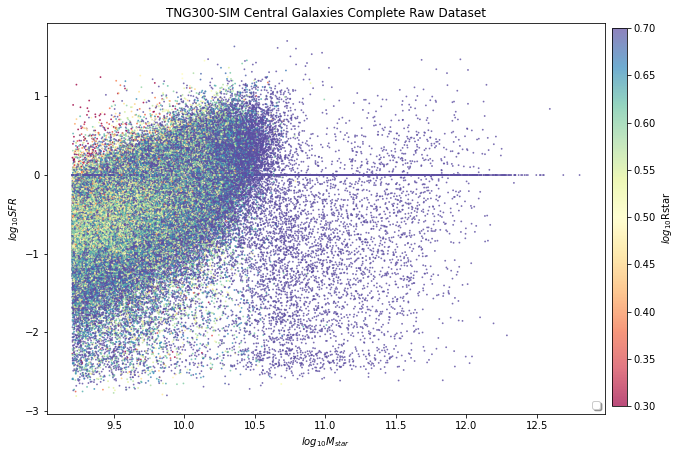

In [19]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(df300.loc[:, 'SubhaloMstar_Log'], df300.loc[:, 'SubhaloSFRinRad_Log'],
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df300.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG300-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG300-SIM_Raw_SFRvsMstar_colorRstar_Log.jpeg", dpi=500)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


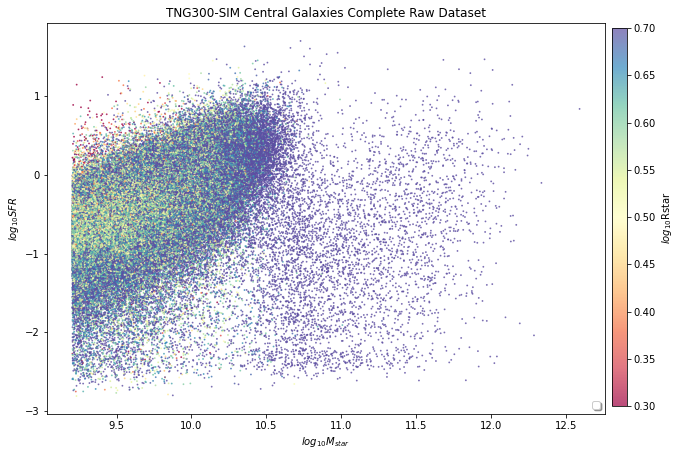

In [20]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(np.log10(df300.loc[:, 'SubhaloMstar']), np.log10(df300.loc[:, 'SubhaloSFRinRad']),
                  s=3, marker='.', alpha=0.7,
                 c = np.log10(df300.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG300-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG300-SIM_Raw_SFRvsMstar_colorRstar.jpeg", dpi=500)
plt.show()

### How many galaxies with 0 SFR in each TNG box?

In [21]:
# In TNG50 SIM there are 3,509 SFRinRad=0 values, out of 12,682 galaxies (about 27%)
np.isinf(np.log10(df50.loc[:, 'SubhaloSFRinRad'])).values.sum() 

3509

In [23]:
# In TNG100 SIM there are 1,715 SFRinRad=0 values, out of ~22,000 galaxies (about 8%)
np.isinf(np.log10(df100_raw.loc[:, 'SubhaloSFRinRad'])).values.sum() 

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


1715

In [23]:
# In TNG300 SIM there are 66,679 SFRinRad=0 values, out of 211,869 galaxies (about 31.5%)
np.isinf(np.log10(df300.loc[:, 'SubhaloSFRinRad'])).values.sum() 

66679

### Divide TNG100 SIM dataset by LogMstar bins

In [9]:
df100_raw.columns.to_list()

['SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloGasMetallicity',
 'SubhaloSFRinRad',
 'SubhaloStarMetallicity',
 'SubhaloVelDisp',
 'SubhaloVmax',
 'SubhaloVmaxRad',
 'SubhaloRgas',
 'SubhaloRstar',
 'SubhaloMgas',
 'SubhaloMstar',
 'GroupNsubs',
 'GroupBHMass',
 'Group_M_TopHat200',
 'Group_R_TopHat200',
 'SubhaloMHI',
 'SubhaloMH2',
 'Group_V_TopHat200',
 'GroupSpin_dmo']

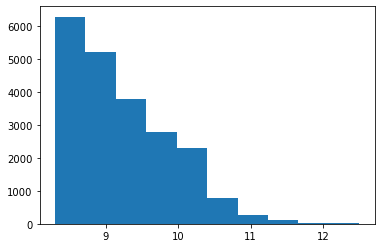

In [14]:
plt.hist(np.log10(df100_raw.SubhaloMstar))
plt.show()

In [11]:
df100_8_9 = df100_raw[df100_raw.SubhaloMstar_Log < 9.0]

In [12]:
df100_9_10 = df100_raw[(df100_raw.SubhaloMstar_Log >= 9.0) &
                                (df100_raw.SubhaloMstar_Log < 10.0)]

In [13]:
df100_10_11 = df100_raw[(df100_raw.SubhaloMstar_Log >= 10.0) & (df100_raw.SubhaloMstar_Log < 11.0)]

In [14]:
df100_11_12 = df100_raw[(df100_raw.SubhaloMstar_Log >= 11.0) & (df100_raw.SubhaloMstar_Log < 12.0)]

In [15]:
df100_13 = df100_raw[df100_raw.SubhaloMstar_Log > 12.0]

In [16]:
df100_raw.SubhaloMstar_Log.max()

12.497443029138495

In [17]:
print(df100_8_9.shape)
print(df100_9_10.shape)
print(df100_10_11.shape)
print(df100_11_12.shape)
print(df100_13.shape)

(9868, 23)
(8321, 23)
(3119, 23)
(276, 23)
(14, 23)


### Divide TNG50 SIM dataset by LogMstar bins

In [25]:
df50.SubhaloMstar_Log.min()

7.398085976572164

In [26]:
df50.SubhaloMstar_Log.max()

11.39387483636665

In [27]:
df50_7_8 = df50[df50.SubhaloMstar_Log < 8.0]

df50_8_9 = df50[(df50.SubhaloMstar_Log >= 8.0) &
                                (df50.SubhaloMstar_Log < 9.0)]

df50_9_10 = df50[(df50.SubhaloMstar_Log >= 9.0) &
                                (df50.SubhaloMstar_Log < 10.0)]

df50_10_11 = df50[(df50.SubhaloMstar_Log >= 10.0) & (df50.SubhaloMstar_Log < 11.0)]

df50_11_12 = df50[df50.SubhaloMstar_Log >= 11.0]

In [28]:
print(df50_7_8.shape)
print(df50_8_9.shape)
print(df50_9_10.shape)
print(df50_10_11.shape)
print(df50_11_12.shape)

(4923, 49)
(5051, 49)
(2138, 49)
(561, 49)
(9, 49)


### Divide TNG300 SIM dataset by LogMstar bins

In [30]:
df300.SubhaloMstar_Log.min()

9.204120573296018

In [31]:
df300.SubhaloMstar_Log.max()

12.803850810616577

In [32]:
df300_9_10 = df300[(df300.SubhaloMstar_Log >= 9.0) &
                                (df300.SubhaloMstar_Log < 10.0)]

df300_10_11 = df300[(df300.SubhaloMstar_Log >= 10.0) & (df300.SubhaloMstar_Log < 11.0)]

df300_11_12 = df300[(df300.SubhaloMstar_Log >= 11.0) & (df300.SubhaloMstar_Log < 12.0)]

df300_13 = df300[df300.SubhaloMstar_Log > 12.0]

In [33]:
print(df300_9_10.shape)
print(df300_10_11.shape)
print(df300_11_12.shape)
print(df300_13.shape)

(129665, 49)
(75966, 49)
(6086, 49)
(152, 49)


### <font color='darkviolet'> TNG100 SIM: Find mean Mstar, Rstar & SFRinRad value for each Mstar bin

#### Mean Mstar

In [18]:
# mean Log Mstar in bin 8-9
sim100_mMstar_8_9 = np.mean(df100_8_9.loc[:, 'SubhaloMstar_Log'])
print(sim100_mMstar_8_9)

sim100_mMstar_9_10 = np.mean(df100_9_10.loc[:, 'SubhaloMstar_Log'])
print(sim100_mMstar_9_10)

sim100_mMstar_10_11 = np.mean(df100_10_11.loc[:, 'SubhaloMstar_Log'])
print(sim100_mMstar_10_11)

sim100_mMstar_11_12 = np.mean(df100_11_12.loc[:, 'SubhaloMstar_Log'])
print(sim100_mMstar_11_12)

sim100_mMstar_13 = np.mean(df100_13.loc[:, 'SubhaloMstar_Log'])
print(sim100_mMstar_13)

8.632979929361756
9.437655266552344
10.318071577622101
11.344910662231916
12.206414975736896


In [78]:
df100_10_11.loc[:, 'SubhaloMstar_Log'].max()

10.998982777699297

#### Mean Rstar

In [19]:
# mean Log Rstar in bin 8-9
sim100_mRstar_8_9 = np.mean(df100_8_9.loc[:, 'SubhaloRstar_Log'])
print(sim100_mRstar_8_9)

sim100_mRstar_9_10 = np.mean(df100_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim100_mRstar_9_10)

sim100_mRstar_10_11 = np.mean(df100_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim100_mRstar_10_11)

sim100_mRstar_11_12 = np.mean(df100_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim100_mRstar_11_12)

sim100_mRstar_13 = np.mean(df100_13.loc[:, 'SubhaloRstar_Log'])
print(sim100_mRstar_13)

0.39410688276797856
0.472255211047119
0.6450258943703104
1.173193999566118
1.6791235950513541


In [21]:
# std Rstar in bin 8-9
sim100_stdRstar_8_9 = np.std(df100_8_9.loc[:, 'SubhaloRstar_Log'])
print(sim100_stdRstar_8_9)

sim100_stdRstar_9_10 = np.std(df100_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim100_stdRstar_9_10)

sim100_stdRstar_10_11 = np.std(df100_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim100_stdRstar_10_11)

sim100_stdRstar_11_12 = np.std(df100_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim100_stdRstar_11_12)

sim100_stdRstar_13 = np.std(df100_13.loc[:, 'SubhaloRstar_Log'])
print(sim100_stdRstar_13)

0.1370694530315528
0.1711669384482952
0.21036505747456877
0.18154506419504468
0.1721938930626409


#### Mean SFRinRad

In [20]:
# mean Log SFR in bin 8-9
sim100_mSFR_8_9 = np.mean(df100_8_9.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_mSFR_8_9)

sim100_mSFR_9_10 = np.mean(df100_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_mSFR_9_10)

sim100_mSFR_10_11 = np.mean(df100_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_mSFR_10_11)

sim100_mSFR_11_12 = np.mean(df100_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_mSFR_11_12)

sim100_mSFR_13 = np.mean(df100_13.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_mSFR_13)

-1.2193770774313901
-0.5603656046639414
-0.10579505384932571
-0.3477096867001895
0.12593840368858839


In [22]:
# std SFR in bin 8-9
sim100_stdSFR_8_9 = np.std(df100_8_9.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_stdSFR_8_9)

sim100_stdSFR_9_10 = np.std(df100_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_stdSFR_9_10)

sim100_stdSFR_10_11 = np.std(df100_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_stdSFR_10_11)

sim100_stdSFR_11_12 = np.std(df100_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_stdSFR_11_12)

sim100_stdSFR_13 = np.std(df100_13.loc[:, 'SubhaloSFRinRad_Log'])
print(sim100_stdSFR_13)

0.5325204914322544
0.4191498898771474
0.6430148969680196
0.9443875684781797
0.6168345969366957


### <font color='darkviolet'> TNG50 SIM: Find mean Mstar, Rstar & SFRinRad value for each Mstar bin

#### Mean Mstar

In [35]:
# mean Log Mstar in bin 8-9
sim50_mMstar_7_8 = np.mean(df50_7_8.loc[:, 'SubhaloMstar_Log'])
print(sim50_mMstar_7_8)

sim50_mMstar_8_9 = np.mean(df50_8_9.loc[:, 'SubhaloMstar_Log'])
print(sim50_mMstar_8_9)

sim50_mMstar_9_10 = np.mean(df50_9_10.loc[:, 'SubhaloMstar_Log'])
print(sim50_mMstar_9_10)

sim50_mMstar_10_11 = np.mean(df50_10_11.loc[:, 'SubhaloMstar_Log'])
print(sim50_mMstar_10_11)

sim50_mMstar_11_12 = np.mean(df50_11_12.loc[:, 'SubhaloMstar_Log'])
print(sim50_mMstar_11_12)

7.68230477206115
8.443833072380743
9.431967996969648
10.301846628339193
11.217357938350382


#### Mean Rstar

In [36]:
# mean Log Rstar in bin 8-9
sim50_mRstar_7_8 = np.mean(df50_7_8.loc[:, 'SubhaloRstar_Log'])
print(sim50_mRstar_7_8)

sim50_mRstar_8_9 = np.mean(df50_8_9.loc[:, 'SubhaloRstar_Log'])
print(sim50_mRstar_8_9)

sim50_mRstar_9_10 = np.mean(df50_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim50_mRstar_9_10)

sim50_mRstar_10_11 = np.mean(df50_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim50_mRstar_10_11)

sim50_mRstar_11_12 = np.mean(df50_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim50_mRstar_11_12)

0.013510666320713178
0.02121230539320559
0.42432256225602666
0.7411103442602359
1.0447844610569978


In [37]:
# std Mstar in bin 8-9
sim50_stdRstar_7_8 = np.std(df50_7_8.loc[:, 'SubhaloRstar_Log'])
print(sim50_stdRstar_7_8)

sim50_stdRstar_8_9 = np.std(df50_8_9.loc[:, 'SubhaloRstar_Log'])
print(sim50_stdRstar_8_9)

sim50_stdRstar_9_10 = np.std(df50_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim50_stdRstar_9_10)

sim50_stdRstar_10_11 = np.std(df50_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim50_stdRstar_10_11)

sim50_stdRstar_11_12 = np.std(df50_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim50_stdRstar_11_12)

0.15230651505007692
0.2566762105948396
0.2520755263566136
0.2674009449294513
0.21814438919983767


#### Mean SFR

In [38]:
# mean Log SFRinRad in bin 8-9
sim50_mSFR_7_8 = np.mean(df50_7_8.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_mSFR_7_8)

sim50_mSFR_8_9 = np.mean(df50_8_9.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_mSFR_8_9)

sim50_mSFR_9_10 = np.mean(df50_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_mSFR_9_10)

sim50_mSFR_10_11 = np.mean(df50_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_mSFR_10_11)

sim50_mSFR_11_12 = np.mean(df50_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_mSFR_11_12)

-1.3568534422707659
-1.1305344554068313
-0.6223178403319038
-0.06595210580721504
0.6595681130213298


In [39]:
# std Log SFRinRad in bin 8-9
sim50_stdSFR_7_8 = np.std(df50_7_8.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_stdSFR_7_8)

sim50_stdSFR_8_9 = np.std(df50_8_9.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_stdSFR_8_9)

sim50_stdSFR_9_10 = np.std(df50_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_stdSFR_9_10)

sim50_stdSFR_10_11 = np.std(df50_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_stdSFR_10_11)

sim50_stdSFR_11_12 = np.std(df50_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim50_stdSFR_11_12)

1.1913904995606899
0.7488419931265174
0.5423829409406012
0.7140609064466259
0.8280589654202246


### <font color='darkviolet'> TNG300 SIM: Find mean Mstar, Rstar & SFRinRad value for each Mstar bin

#### Mean Mstar

In [40]:
# mean Log Mstar in bin 8-9

sim300_mMstar_9_10 = np.mean(df300_9_10.loc[:, 'SubhaloMstar_Log'])
print(sim300_mMstar_9_10)

sim300_mMstar_10_11 = np.mean(df300_10_11.loc[:, 'SubhaloMstar_Log'])
print(sim300_mMstar_10_11)

sim300_mMstar_11_12 = np.mean(df300_11_12.loc[:, 'SubhaloMstar_Log'])
print(sim300_mMstar_11_12)

sim300_mMstar_13 = np.mean(df300_13.loc[:, 'SubhaloMstar_Log'])
print(sim300_mMstar_13)

9.576114407956819
10.352490093583185
11.277506466708463
12.164730246627038


#### Mean Rstar

In [41]:
# mean Log Rstar in bin 9-10

sim300_mRstar_9_10 = np.mean(df300_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim300_mRstar_9_10)

sim300_mRstar_10_11 = np.mean(df300_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim300_mRstar_10_11)

sim300_mRstar_11_12 = np.mean(df300_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim300_mRstar_11_12)

sim300_mRstar_13 = np.mean(df300_13.loc[:, 'SubhaloRstar_Log'])
print(sim300_mRstar_13)

0.6340450392293027
0.711092341463042
1.2081414696513375
1.8301452253855697


In [43]:
# std Rstar in bin 9-10
sim300_stdRstar_9_10 = np.std(df300_9_10.loc[:, 'SubhaloRstar_Log'])
print(sim300_stdRstar_9_10)

sim300_stdRstar_10_11 = np.std(df300_10_11.loc[:, 'SubhaloRstar_Log'])
print(sim300_stdRstar_10_11)

sim300_stdRstar_11_12 = np.std(df300_11_12.loc[:, 'SubhaloRstar_Log'])
print(sim300_stdRstar_11_12)

sim300_stdRstar_13 = np.std(df300_13.loc[:, 'SubhaloRstar_Log'])
print(sim300_stdRstar_13)

0.13300224905968416
0.14469602024515293
0.19973973242572066
0.18501092331677238


#### Mean SFRinRad

In [44]:
# mean Log SFR in bin 9-10
sim300_mSFR_9_10 = np.mean(df300_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_mSFR_9_10)

sim300_mSFR_10_11 = np.mean(df300_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_mSFR_10_11)

sim300_mSFR_11_12 = np.mean(df300_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_mSFR_11_12)

sim300_mSFR_13 = np.mean(df300_13.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_mSFR_13)

-0.43681658964135384
-0.02715656467465821
-0.24694933949074424
-0.04759958175082566


In [45]:
# std SFR in bin 9-10
sim300_stdSFR_9_10 = np.std(df300_9_10.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_stdSFR_9_10)

sim300_stdSFR_10_11 = np.std(df300_10_11.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_stdSFR_10_11)

sim300_stdSFR_11_12 = np.std(df300_11_12.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_stdSFR_11_12)

sim300_stdSFR_13 = np.std(df300_13.loc[:, 'SubhaloSFRinRad_Log'])
print(sim300_stdSFR_13)

0.493008088386797
0.4063765292040553
0.6055891221666725
0.5030199268498546


### Plots

In [46]:
sim100_mMstar = np.array([sim100_mMstar_8_9, sim100_mMstar_9_10, sim100_mMstar_10_11, 
                          sim100_mMstar_11_12, sim100_mMstar_13])

sim100_mRstar = np.array([sim100_mRstar_8_9, sim100_mRstar_9_10, sim100_mRstar_10_11, 
                          sim100_mRstar_11_12, sim100_mRstar_13])

sim100_stdRstar = np.array([sim100_stdRstar_8_9, sim100_stdRstar_9_10, sim100_stdRstar_10_11, 
                            sim100_stdRstar_11_12, sim100_stdRstar_13])

In [52]:
sim100_mSFR = np.array([sim100_mSFR_8_9, sim100_mSFR_9_10, sim100_mSFR_10_11, 
                          sim100_mSFR_11_12, sim100_mSFR_13])

sim100_stdSFR = np.array([sim100_stdSFR_8_9, sim100_stdSFR_9_10, sim100_stdSFR_10_11, 
                            sim100_stdSFR_11_12, sim100_stdSFR_13])

In [47]:
sim50_mMstar = np.array([sim50_mMstar_7_8,
                        sim50_mMstar_8_9, sim50_mMstar_9_10, sim50_mMstar_10_11, 
                          sim50_mMstar_11_12])

sim50_mRstar = np.array([sim50_mRstar_7_8,
                        sim50_mRstar_8_9, sim50_mRstar_9_10, sim50_mRstar_10_11, 
                          sim50_mRstar_11_12])

sim50_stdRstar = np.array([sim50_stdRstar_7_8,
                            sim50_stdRstar_8_9, sim50_stdRstar_9_10, sim50_stdRstar_10_11, 
                            sim50_stdRstar_11_12])

In [53]:
sim50_mSFR = np.array([sim50_mSFR_7_8,
                        sim50_mSFR_8_9, sim50_mSFR_9_10, sim50_mSFR_10_11, 
                          sim50_mSFR_11_12])

sim50_stdSFR = np.array([ sim50_stdSFR_7_8,
                        sim50_stdSFR_8_9, sim50_stdSFR_9_10, sim50_stdSFR_10_11, 
                            sim50_stdSFR_11_12])

In [48]:
sim300_mMstar = np.array([ sim300_mMstar_9_10, sim300_mMstar_10_11, 
                          sim300_mMstar_11_12, sim300_mMstar_13])

sim300_mRstar = np.array([ sim300_mRstar_9_10, sim300_mRstar_10_11, 
                          sim300_mRstar_11_12, sim300_mRstar_13])

sim300_stdRstar = np.array([ sim300_stdRstar_9_10, sim300_stdRstar_10_11, 
                            sim300_stdRstar_11_12, sim300_stdRstar_13])

In [54]:
sim300_mSFR = np.array([ sim300_mSFR_9_10, sim300_mSFR_10_11, 
                          sim300_mSFR_11_12, sim300_mSFR_13])

sim300_stdSFR = np.array([ sim300_stdSFR_9_10, sim300_stdSFR_10_11, 
                            sim300_stdSFR_11_12, sim300_stdSFR_13])

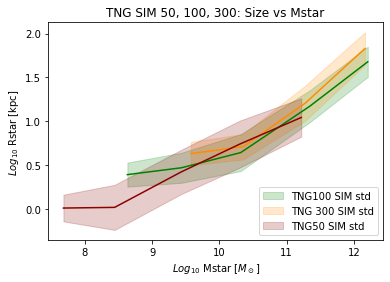

In [50]:
plt.plot(sim100_mMstar, sim100_mRstar, '-', color='green')

plt.fill_between(sim100_mMstar, sim100_mRstar - sim100_stdRstar, sim100_mRstar + sim100_stdRstar,
                 color='green', alpha=0.2, label='TNG100 SIM std')

plt.plot(sim300_mMstar, sim300_mRstar, '-', color='darkorange')

plt.fill_between(sim300_mMstar, sim300_mRstar - sim300_stdRstar, sim300_mRstar + sim300_stdRstar,
                 color='darkorange', alpha=0.2, label='TNG 300 SIM std')

plt.plot(sim50_mMstar, sim50_mRstar, '-', color='darkred')

plt.fill_between(sim50_mMstar, sim50_mRstar - sim50_stdRstar, sim50_mRstar + sim50_stdRstar,
                 color='darkred', alpha=0.2, label='TNG50 SIM std')

plt.title('TNG SIM 50, 100, 300: Size vs Mstar')
plt.xlabel('$ Log_{10} $ Mstar $[M_\odot]$')
plt.ylabel('$ Log_{10} $ Rstar [kpc] ')
plt.legend(loc='lower right')
# plt.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_LogRstar_vs_LogMstar.jpeg", dpi=500)
plt.show() 

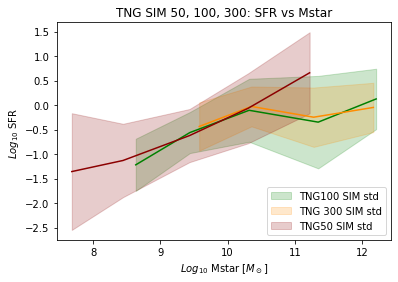

In [56]:
plt.plot(sim100_mMstar, sim100_mSFR, '-', color='green')

plt.fill_between(sim100_mMstar, sim100_mSFR - sim100_stdSFR, sim100_mSFR + sim100_stdSFR,
                 color='green', alpha=0.2, label='TNG100 SIM std')

plt.plot(sim300_mMstar, sim300_mSFR, '-', color='darkorange')

plt.fill_between(sim300_mMstar, sim300_mSFR - sim300_stdSFR, sim300_mSFR + sim300_stdSFR,
                 color='darkorange', alpha=0.2, label='TNG 300 SIM std')

plt.plot(sim50_mMstar, sim50_mSFR, '-', color='darkred')

plt.fill_between(sim50_mMstar, sim50_mSFR - sim50_stdSFR, sim50_mSFR + sim50_stdSFR,
                 color='darkred', alpha=0.2, label='TNG50 SIM std')

plt.title('TNG SIM 50, 100, 300: SFR vs Mstar')
plt.xlabel('$ Log_{10} $ Mstar $[M_\odot]$')
plt.ylabel('$ Log_{10} $ SFR  ')
plt.legend(loc='lower right')
# plt.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_LogSFR_vs_LogMstar.jpeg", dpi=500)
plt.show() 

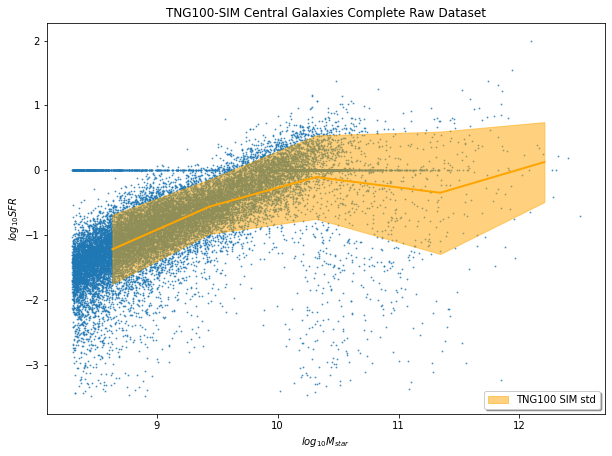

In [76]:
# In this plot, all SFRinRad=0 values remain so after taking the Log of SFRinRad
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(df100_raw.loc[:, 'SubhaloMstar_Log'], df100_raw.loc[:, 'SubhaloSFRinRad_Log'],
                  s=3, marker='.', alpha=0.7
           )
im5 = ax5.plot(sim100_mMstar, sim100_mSFR, '-', color='orange', linewidth = 2)
im5 = ax5.fill_between(sim100_mMstar, sim100_mSFR - sim100_stdSFR, sim100_mSFR + sim100_stdSFR,
                 color='orange', alpha=0.5, label='TNG100 SIM std')
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG100-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

# cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
# fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG100-SIM_Raw_SFRvsMstar_SFRmean.jpeg", dpi=500)
plt.show()

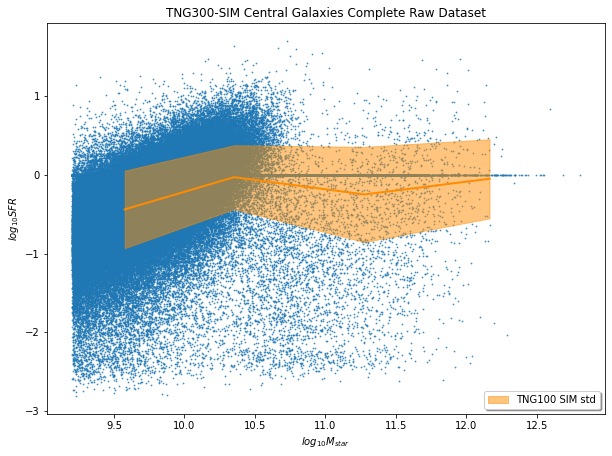

In [77]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))


im5 = ax5.scatter(df300.loc[:, 'SubhaloMstar_Log'], df300.loc[:, 'SubhaloSFRinRad_Log'],
                  s=3, marker='.', alpha=0.7) #,
#                  c = np.log10(df300.loc[:, 'SubhaloRstar']),cmap='Spectral', vmin=0.3, vmax=0.7)
im5 = ax5.plot(sim300_mMstar, sim300_mSFR, '-', color='darkorange', linewidth = 2)
im5 = ax5.fill_between(sim300_mMstar, sim300_mSFR - sim300_stdSFR, sim300_mSFR + sim300_stdSFR,
                 color='darkorange', alpha=0.5, label='TNG100 SIM std')
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
# ax5.axis([0.0,40, 0.0,40])
# ax5.plot([0.0, 40], [0.0, 40], color = 'black', linewidth = 2)
ax5.set_title(r'TNG300-SIM Central Galaxies Complete Raw Dataset')
ax5.set_xlabel(r'$log_{10}M_{star}$')
ax5.set_ylabel(r'$log_{10}SFR$')
ax5.legend(loc='lower right', shadow=True)

# cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
# fig1.colorbar(im5, cax=cbar_ax, label=r'$log_{10}$Rstar')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v9_SFRvsMstar_50100300boxes/v9_TNG300-SIM_Raw_SFRvsMstar_SFRmean.jpeg", dpi=500)
plt.show()